# Carnevale, Cattoni MiniChallenge

We chosed the Hotel dataset

In [206]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np

In [207]:
with open("hotels.pk", "rb") as f:
    df = pickle.load(f)

# 1. EXPLORATORY ANALYSIS

In [208]:
df.shape

(23254, 4)

In [209]:
df.head()

,Location,Revenue,Demand,Occupancy
Date,,,,
2013-01-01,NewYork,2.442363e+06,13063.675000,81.991307
2013-01-02,NewYork,2.018559e+06,13069.608539,82.028548
2013-01-03,NewYork,1.927676e+06,13069.608539,82.028548
2013-01-04,NewYork,1.781664e+06,12653.271887,79.415502
2013-01-05,NewYork,1.824994e+06,12827.322364,80.507892


In [210]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', name='Date', length=23254, freq=None)

In [211]:
df = df.reset_index()
df.head()

,Date,Location,Revenue,Demand,Occupancy
0,2013-01-01,NewYork,2.442363e+06,13063.675000,81.991307
1,2013-01-02,NewYork,2.018559e+06,13069.608539,82.028548
2,2013-01-03,NewYork,1.927676e+06,13069.608539,82.028548
3,2013-01-04,NewYork,1.781664e+06,12653.271887,79.415502
4,2013-01-05,NewYork,1.824994e+06,12827.322364,80.507892


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23254 entries, 0 to 23253
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23254 non-null  datetime64[ns]
 1   Location   23254 non-null  object        
 2   Revenue    23254 non-null  float64       
 3   Demand     23254 non-null  float64       
 4   Occupancy  23254 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 908.5+ KB


In [213]:
df.columns

Index(['Date', 'Location', 'Revenue', 'Demand', 'Occupancy'], dtype='object')

In [214]:
df["Location"].value_counts()

Location
Atlanta       3227
NewYork       2861
Orlando       2861
Chicago       2861
LosAngeles    2861
Washington    2861
Dallas        2861
Boston        2861
Name: count, dtype: int64

We chose Los Angeles city

In [215]:
df = df[df["Location"] == "LosAngeles"]
df["Location"].value_counts()

Location
LosAngeles    2861
Name: count, dtype: int64

In [216]:
assert (len(df["Location"].unique()) == 1 )
df = df.drop("Location", axis=1)
df.shape

(2861, 4)

In [217]:
df.isnull().sum()

Date         0
Revenue      0
Demand       0
Occupancy    0
dtype: int64

In [218]:
df.duplicated().sum()

0

In [219]:
assert (df["Date"].dt.year.min() == 2013)
assert (df["Date"].dt.year.max() == 2020)

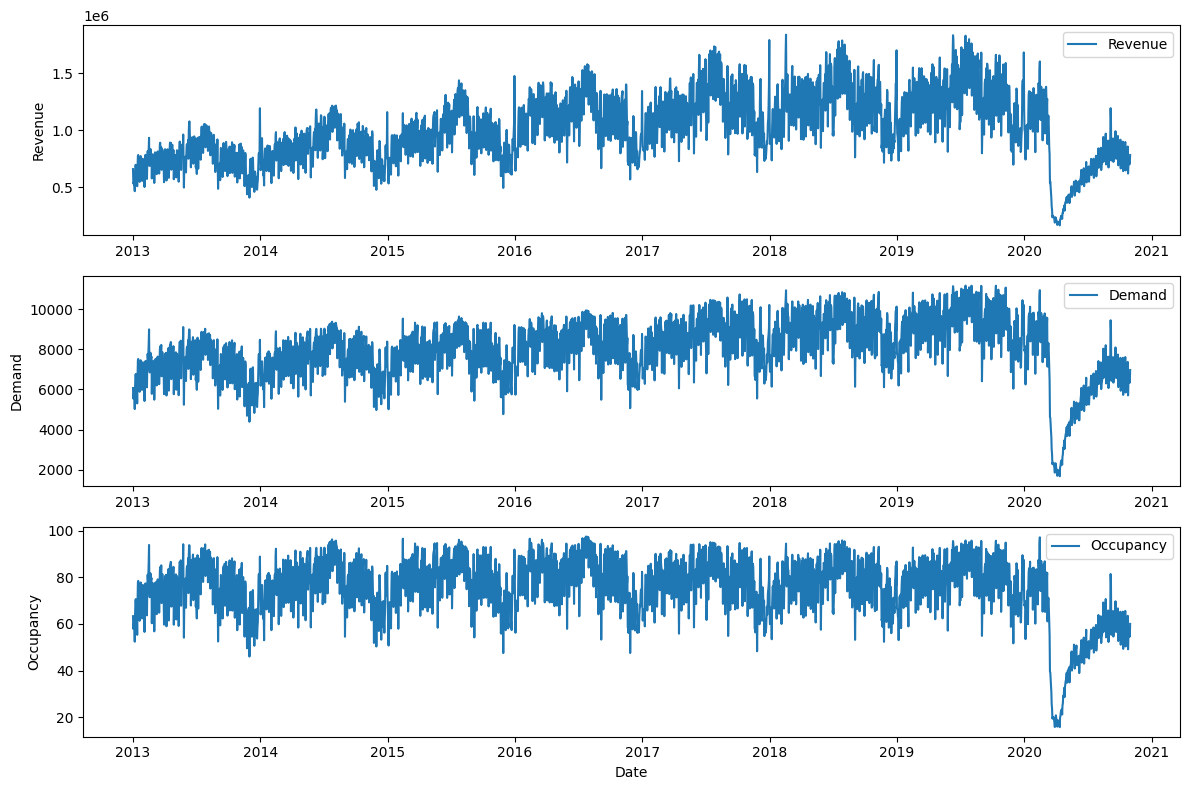

In [220]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

axes[0].plot(df["Date"], df["Revenue"], label="Revenue")
axes[0].set_ylabel("Revenue")
axes[0].legend()

axes[1].plot(df["Date"], df["Demand"], label="Demand")
axes[1].set_ylabel("Demand")
axes[1].legend()

axes[2].plot(df["Date"], df["Occupancy"], label="Occupancy")
axes[2].set_ylabel("Occupancy")
axes[2].set_xlabel("Date")
axes[2].legend()

plt.tight_layout()

We have to exclude the data after 2020, so that the pandemic will not cause us any problems.

In [221]:
df = df[df["Date"].dt.year < 2020]

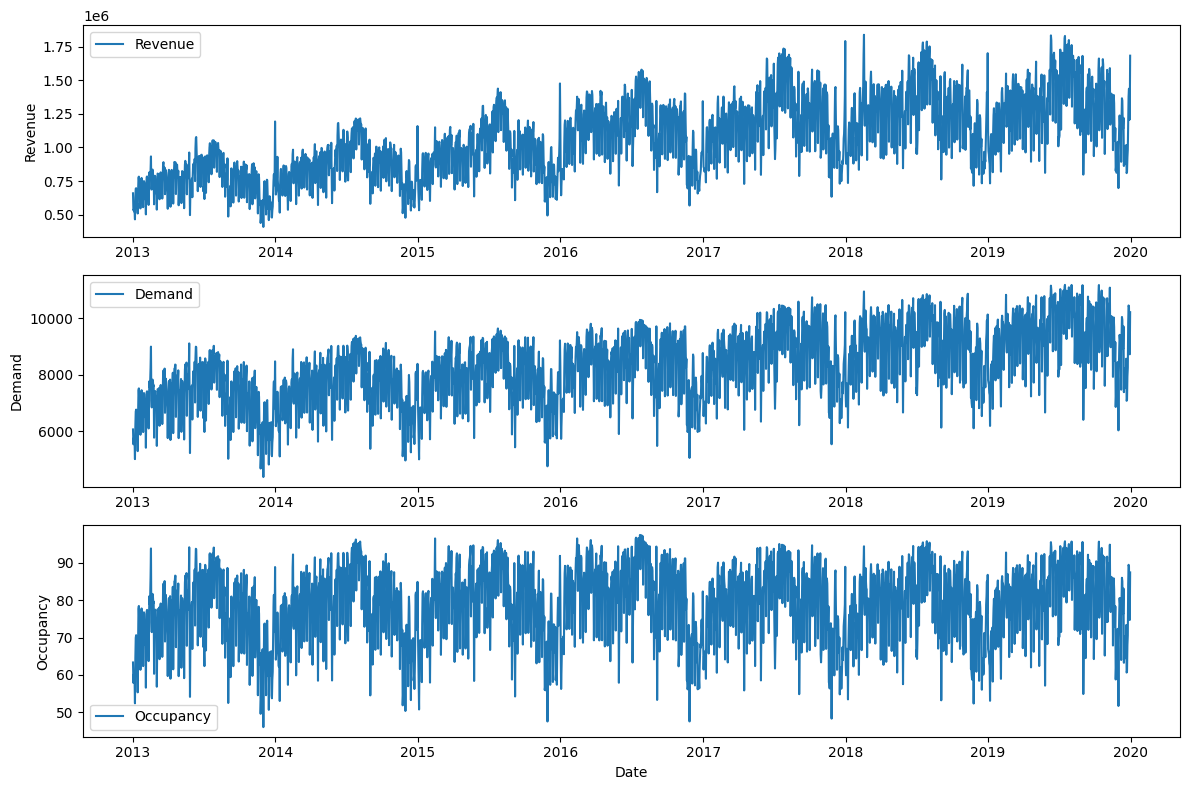

In [222]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

axes[0].plot(df["Date"], df["Revenue"], label="Revenue")
axes[0].set_ylabel("Revenue")
axes[0].legend()

axes[1].plot(df["Date"], df["Demand"], label="Demand")
axes[1].set_ylabel("Demand")
axes[1].legend()

axes[2].plot(df["Date"], df["Occupancy"], label="Occupancy")
axes[2].set_ylabel("Occupancy")
axes[2].set_xlabel("Date")
axes[2].legend()

plt.tight_layout()

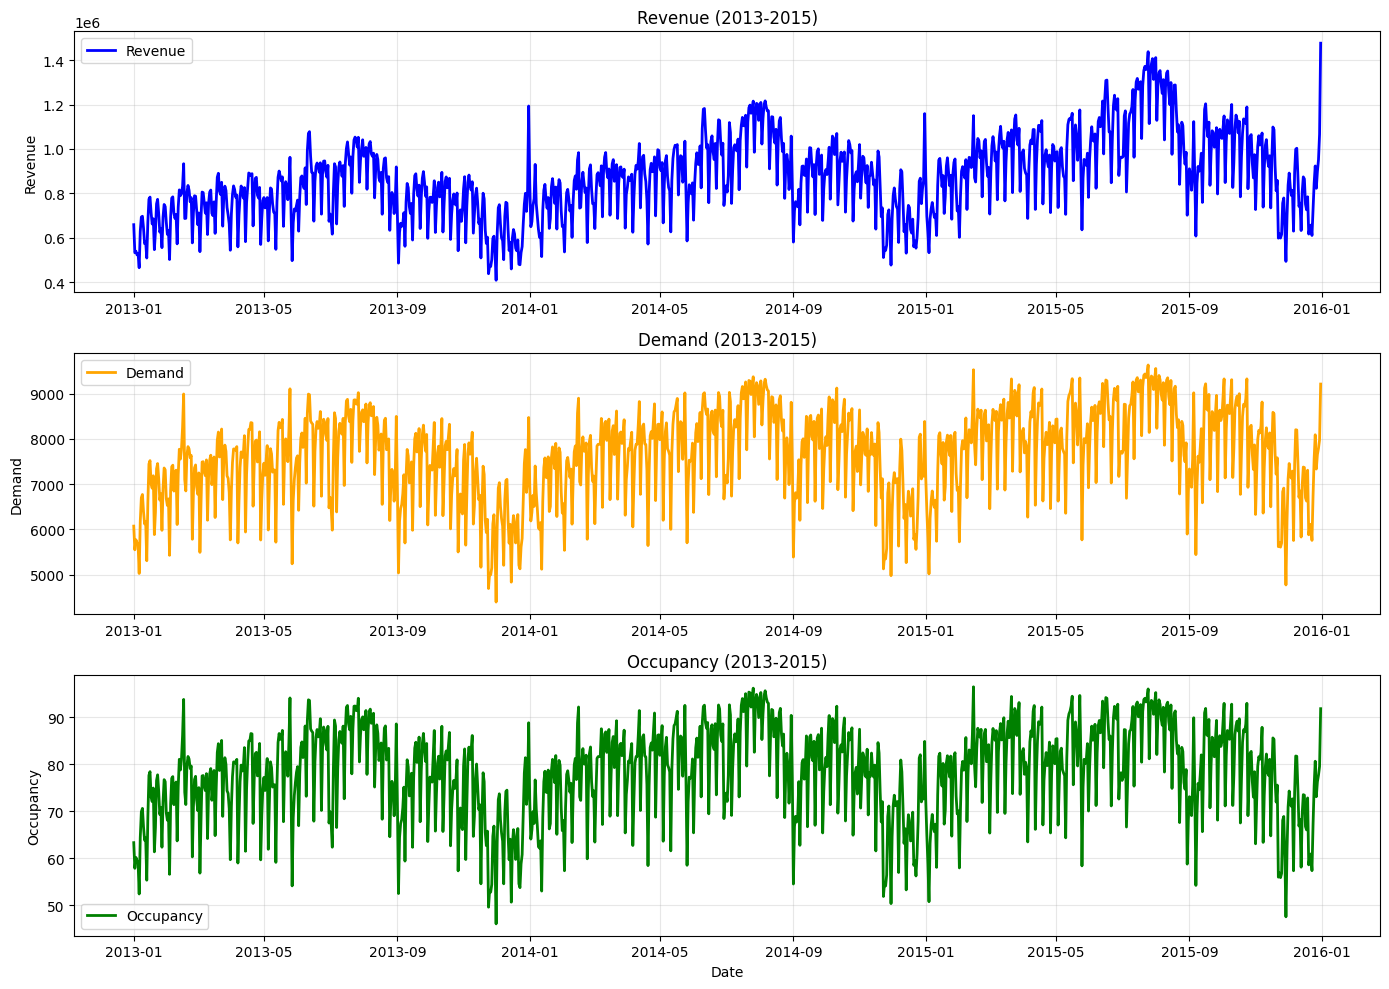

In [223]:
mask = (df["Date"] >= "2013-01-01") & (df["Date"] <= "2015-12-31")
df_filtered = df[mask]

columns = ["Revenue", "Demand", "Occupancy"]
colors = ["blue", "orange", "green"]

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

for idx, (col, color) in enumerate(zip(columns, colors)):
    axes[idx].plot(df_filtered["Date"], df_filtered[col], linewidth=2, label=col, color=color)
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f"{col} (2013-2015)")
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

axes[2].set_xlabel("Date")
plt.tight_layout()
plt.show()


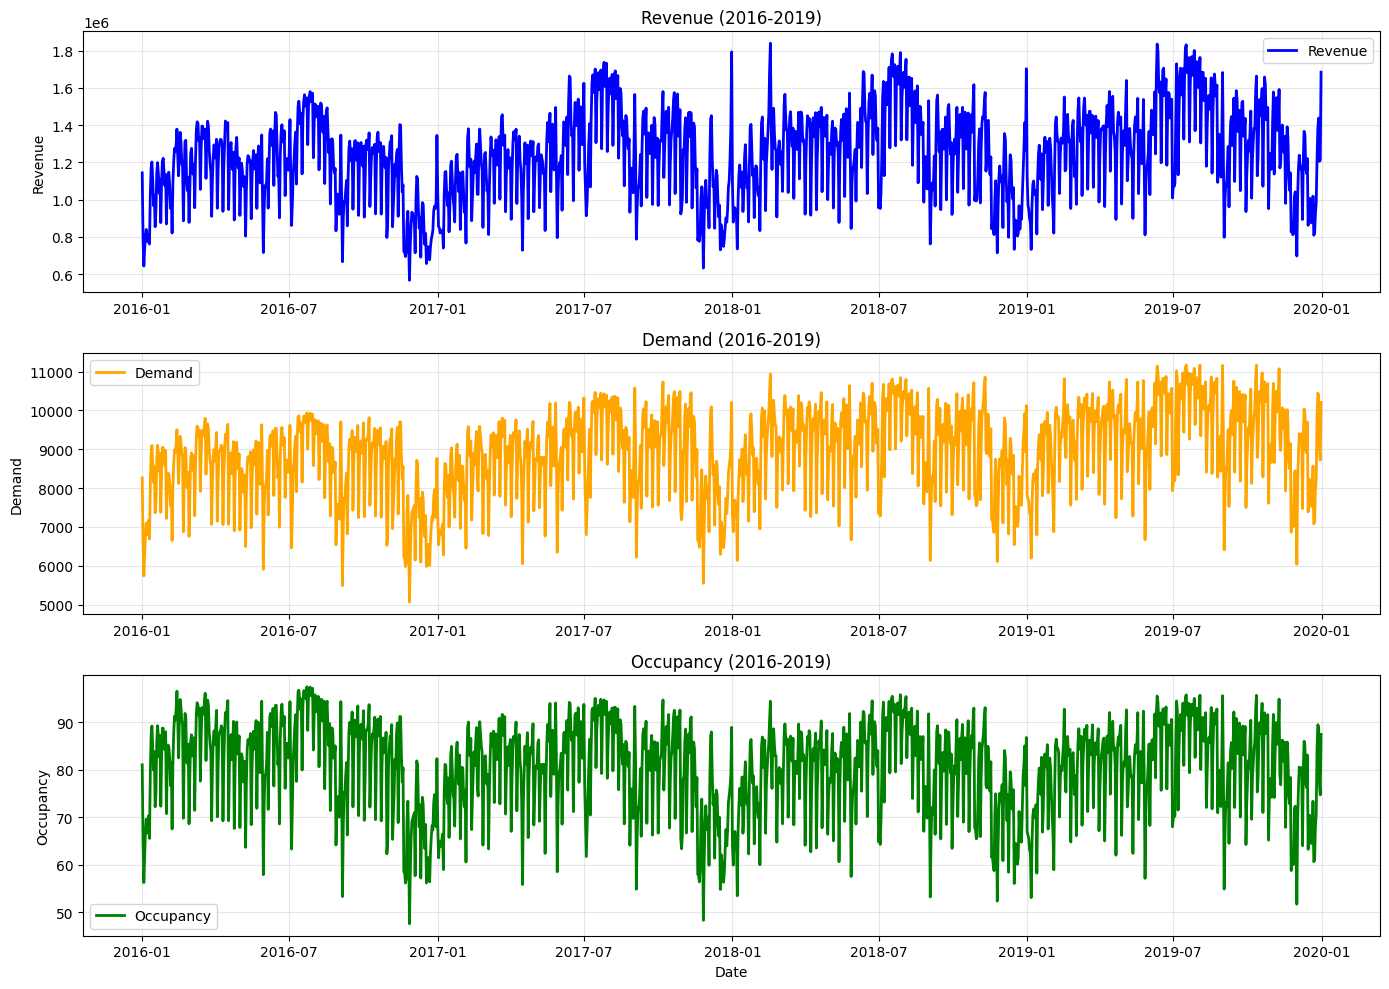

In [224]:
mask = (df["Date"] >= "2016-01-01") & (df["Date"] <= "2019-12-31")
df_filtered = df[mask]

columns = ["Revenue", "Demand", "Occupancy"]
colors = ["blue", "orange", "green"]

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# date of when the world entered into the "Pandemia"
# pandemic_date = pd.Timestamp("2020-03-11")

for idx, (col, color) in enumerate(zip(columns, colors)):
    axes[idx].plot(df_filtered["Date"], df_filtered[col], linewidth=2, label=col, color=color)
    
    # axes[idx].axvline(pandemic_date, color='red', linestyle='--', linewidth=2.5, label='Pandemic (11 Mar 2020)', alpha=0.8)
    
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f"{col} (2016-2019)")
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

axes[2].set_xlabel("Date")
plt.tight_layout()
plt.show()


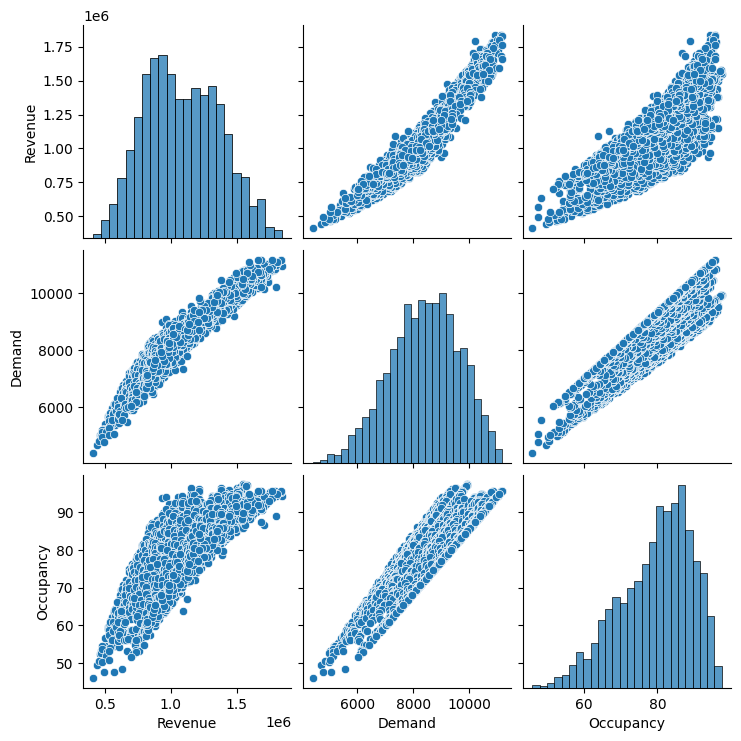

In [225]:
sns.pairplot(df)

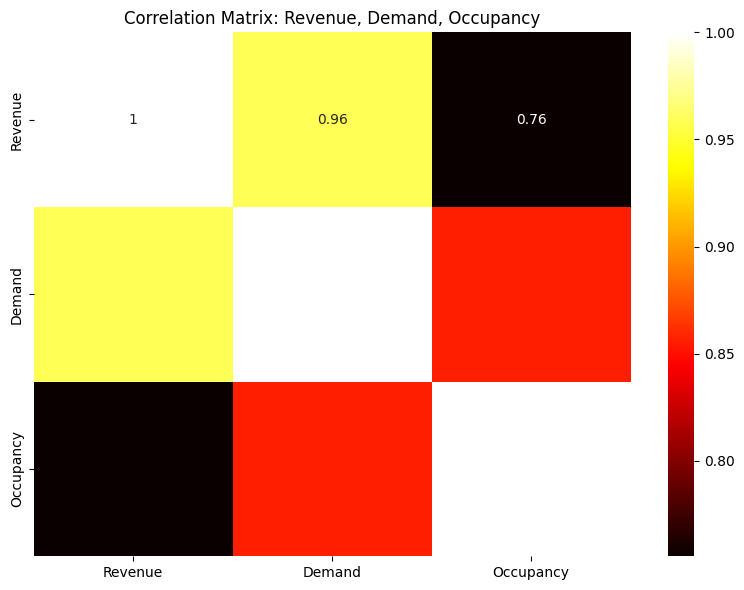

In [226]:
correlation_matrix = df[["Revenue", "Demand", "Occupancy"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap = "hot")
plt.title("Correlation Matrix: Revenue, Demand, Occupancy")
plt.tight_layout()
plt.show()

ACF

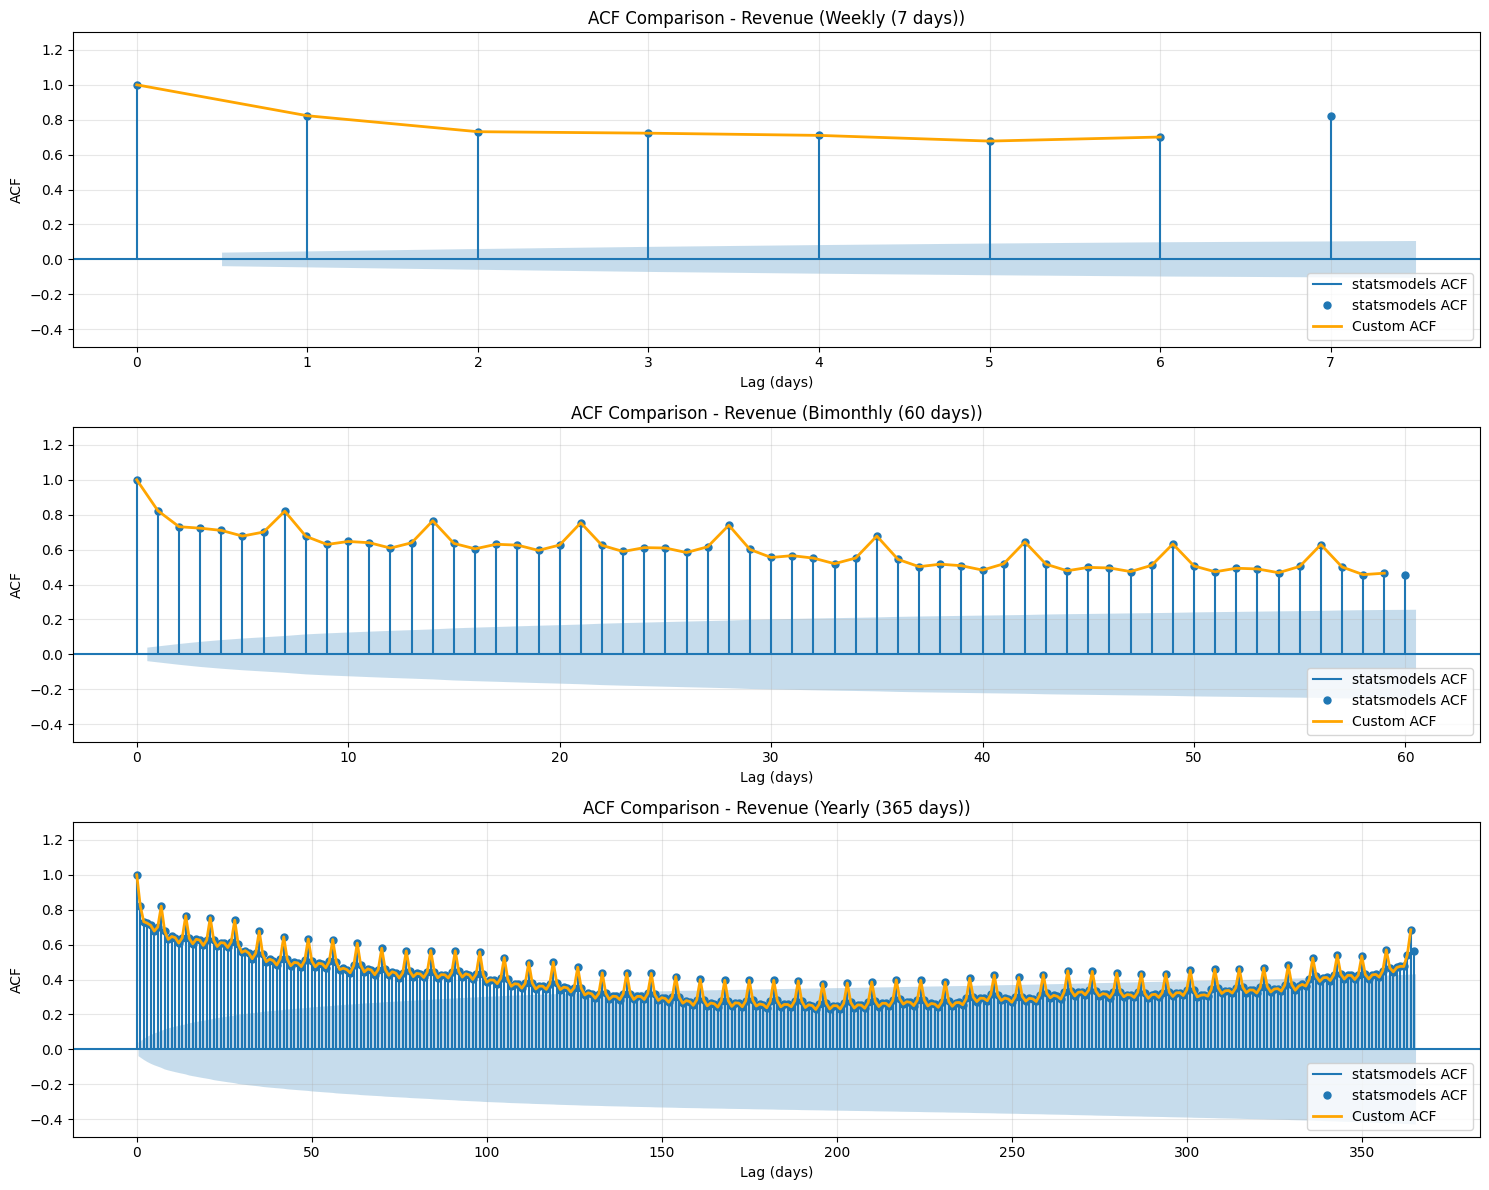

In [227]:
lags_list = [7, 60, 365]
titles = ["Weekly (7 days)", "Bimonthly (60 days)", "Yearly (365 days)"]


acf = lambda x, k: ((x.shift(k) - x.mean()) * (x - x.mean())).sum() / x.std()**2 / len(x)


fig, axes = plt.subplots(3, 1, figsize=(15, 12))


for ax, lags, title in zip(axes, lags_list, titles):
    plot_acf(df['Revenue'], lags=lags, ax=ax, label='statsmodels ACF')
    plt.sca(ax)
    plt.plot([acf(df['Revenue'], k) for k in range(lags)], label='Custom ACF', color='orange', linewidth=2)
    
    ax.set_title(f'ACF Comparison - Revenue ({title})')
    ax.set_xlabel('Lag (days)')
    ax.set_ylabel('ACF')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-0.5, 1.3)
    ax.legend(loc='lower right')


plt.tight_layout()
plt.show()

## Stationarity and Transformations

In [228]:
import warnings
warnings.filterwarnings('ignore')

stationarity_tests = {}

vars_to_check = ['Revenue', 'Demand', 'Occupancy']

for var in vars_to_check:
    adf_test = adfuller(df[var])
    kpss_test = kpss(df[var], nlags='auto')
    stationarity_tests[var] = pd.Series({'adf pval': adf_test[1], 'kpss pval': kpss_test[1]})

pd.concat(stationarity_tests).unstack().sort_values('adf pval')

,adf pval,kpss pval
Occupancy,0.000809,0.083452
Demand,0.043965,0.010000
Revenue,0.075726,0.010000


These values suggest non-stationarity in this data, we procceed by taking differences of consecutive values to eliminate trends

In [229]:
df['Revenue_diff'] = df['Revenue'].diff()

df['Demand_diff'] = df['Demand'].diff()

adf_d1 = adfuller(df['Revenue_diff'].dropna())
kpss_d1 = kpss(df['Revenue_diff'].dropna(), nlags='auto')

print(f"ADF diff: {adf_d1[1]}")
print(f"KPSS diff: {kpss_d1[1]}")

ADF diff: 9.63384394502563e-22
KPSS diff: 0.1


Both ADF and KPSS tests confirm stationarity of the differenced Revenue series (d=1).

## ACF/PACF

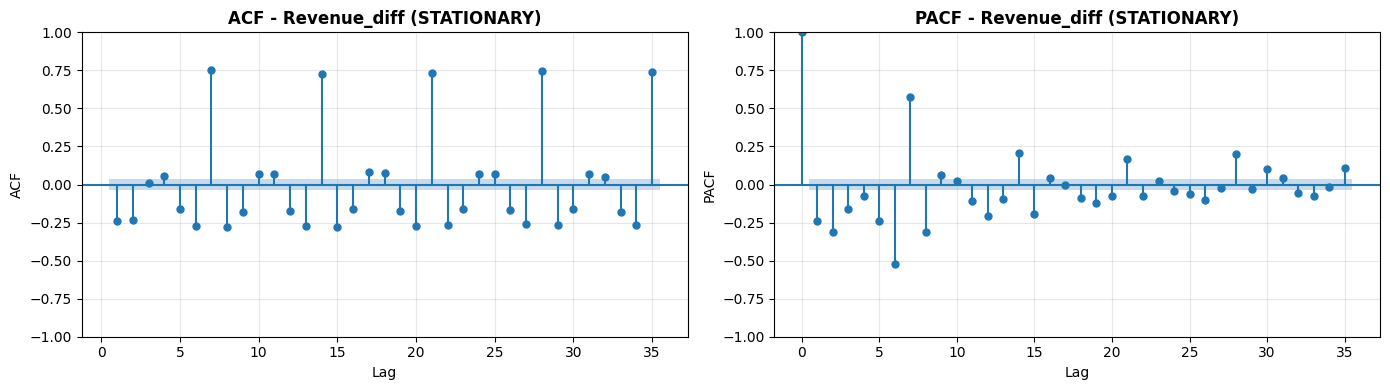

In [230]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

series_diff = df['Revenue_diff'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ACF of the DIFFERENCED series
plot_acf(series_diff, lags=35, ax=axes[0], zero=False, bartlett_confint=False) #35 lags because it is 7*5
axes[0].set_title('ACF - Revenue_diff (STATIONARY)', fontweight='bold')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')
axes[0].grid(True, alpha=0.3)

# PACF of the DIFFERENCED series
plot_pacf(series_diff, lags=35, ax=axes[1], method='ywm') #35 lags because it is 7*5
axes[1].set_title('PACF - Revenue_diff (STATIONARY)', fontweight='bold')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Model Selection and Evaluation

In [231]:
# Helper to return forecast as dataframe
def cast_df(y, df):
    h = len(y)
    return pd.DataFrame(y, index=np.arange(len(df), len(df)+h))

y = df['Revenue']

# Forecasting functions
naive = lambda x, h: cast_df(np.tile(x.iloc[-1], h), x)
mean = lambda x, h: cast_df(np.tile(x.mean(), h), x)

# For daily data, weekly pattern (p = 7)
p = 7

seasonal = lambda x, h: cast_df(np.tile(x.iloc[-p:].values.ravel()-x.iloc[-p:].values[0]+x.iloc[-p:].values[-1], int(p*np.ceil(h/p)))[:h], x)

seasonal_alternative = lambda x, h: cast_df(np.tile(x.iloc[-p:].values, int(np.ceil(h/p)))[:h],x)

In [232]:
# Forecast horizon (7 days)
steps_ahead = p = 7
train = y.iloc[:-steps_ahead]
test = y.iloc[-steps_ahead:]

# Forecasts
forecasters = [naive, mean, seasonal, seasonal_alternative]
names = ['Naive', 'Mean', 'Seasonal Naive', 'Seasonal Naive Semplified']
# forecasts = {n: f(train, steps_ahead) for f, n in zip(forecasters, names)}

forecasts_wrong_index = {n: f(train, steps_ahead) for f, n in zip(forecasters, names)}

forecasts = {}
for name, f_df in forecasts_wrong_index.items():
    forecasts[name] = pd.DataFrame(f_df.values, index=test.index)

# Combine for evaluation
results = pd.DataFrame({
    'Actual': test.values,
    **{n: f.values.flatten() for n, f in forecasts.items()}
}, index=test.index)

# Evaluate performance
mae = results.apply(lambda col: np.mean(np.abs(results['Actual'] - col)))
mape = results.apply(lambda col: np.mean(np.abs((results['Actual'] - col) / results['Actual'])) * 100)

print("MAE:")
print(mae)
print("\nMAPE (%):")
print(mape)

MAE:
Actual                            0.000000
Naive                        377444.545830
Mean                         246414.558044
Seasonal Naive               463269.002171
Seasonal Naive Semplified    401253.393264
dtype: float64

MAPE (%):
Actual                        0.000000
Naive                        27.207419
Mean                         17.547827
Seasonal Naive               33.990571
Seasonal Naive Semplified    29.130822
dtype: float64


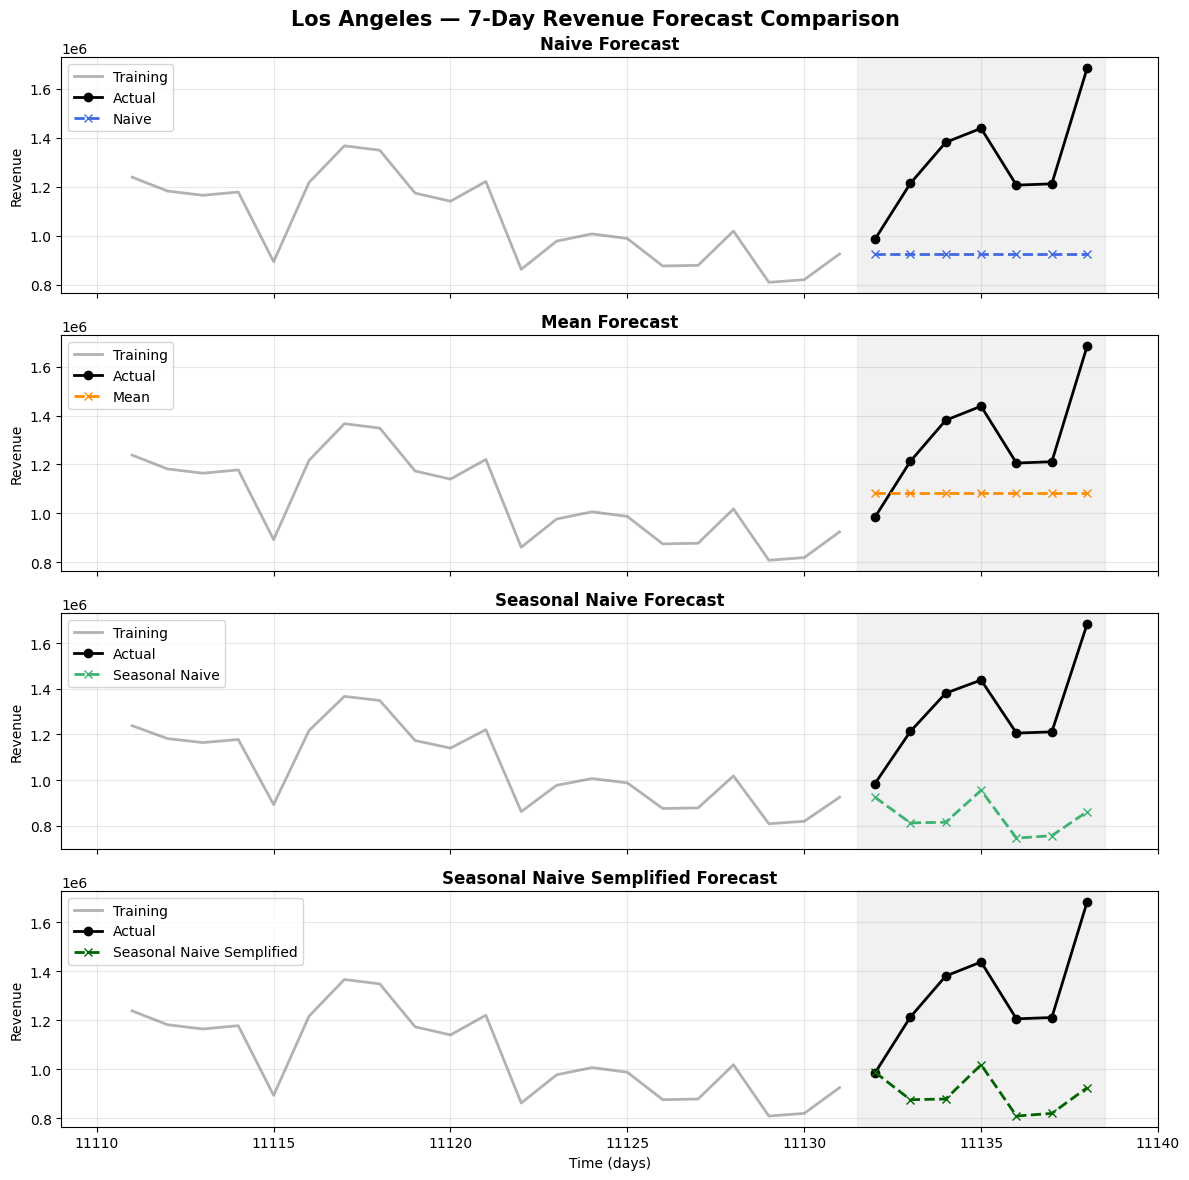

In [233]:
# Lookback period (for context before forecast)
lookback = p*3
plot_start = len(train) - lookback

# Set up figure — 3 rows, one for each forecast
fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

colors = ['royalblue', 'darkorange', 'mediumseagreen', 'darkgreen']

for ax, (name, forecast), color in zip(axes, forecasts.items(), colors):
    ax.plot(train.index[plot_start:], train.iloc[plot_start:], color='gray', label='Training', linewidth=2, alpha=0.6)
    ax.plot(test.index, test.values, color='black', label='Actual', marker='o', linewidth=2)
    ax.plot(forecast.index, forecast.values, color=color, linestyle='--', marker='x', linewidth=2, label=f'{name}')
    ax.axvspan(test.index[0]-0.5, test.index[-1]+0.5, color='lightgray', alpha=0.3)
    ax.set_title(f"{name} Forecast", fontweight='bold')
    ax.set_ylabel("Revenue")
    ax.grid(alpha=0.3)
    ax.legend(loc='upper left')

plt.suptitle("Los Angeles — 7-Day Revenue Forecast Comparison", fontsize=15, weight='bold')
plt.xlabel("Time (days)")
plt.xlim(train.index[plot_start] - 2, test.index[-1] + 2)
plt.tight_layout()
plt.show()


## ARIMA

In [234]:
def format_data(y, covariate_lags, target_lags=None):
    """Format data for autoregressive model"""
    x = []
    target = []
    
    for i in np.sort(covariate_lags)[::-1]:
        y_lagged = y.shift(i)
        y_lagged.name = f'y_{i:02d}'  
        x.append(y_lagged)
    x = pd.concat(x, axis=1).dropna()

    if target_lags is not None:
        for i in target_lags:
            y_lagged = y.shift(i)
            y_lagged.name = f'y_{i:02d}'  
            target.append(y_lagged)
        target = pd.concat(target, axis=1)
        df = pd.concat({'x': x, 'target': target}, axis=1)
        df = df.dropna()
        x = df['x']
        target = df['target']

    return x, target

x, y = format_data(df['Revenue'], covariate_lags=list(range(1, 15)), target_lags=[0])
lags_to_plot = ['y_03', 'y_07', 'y_14'] 

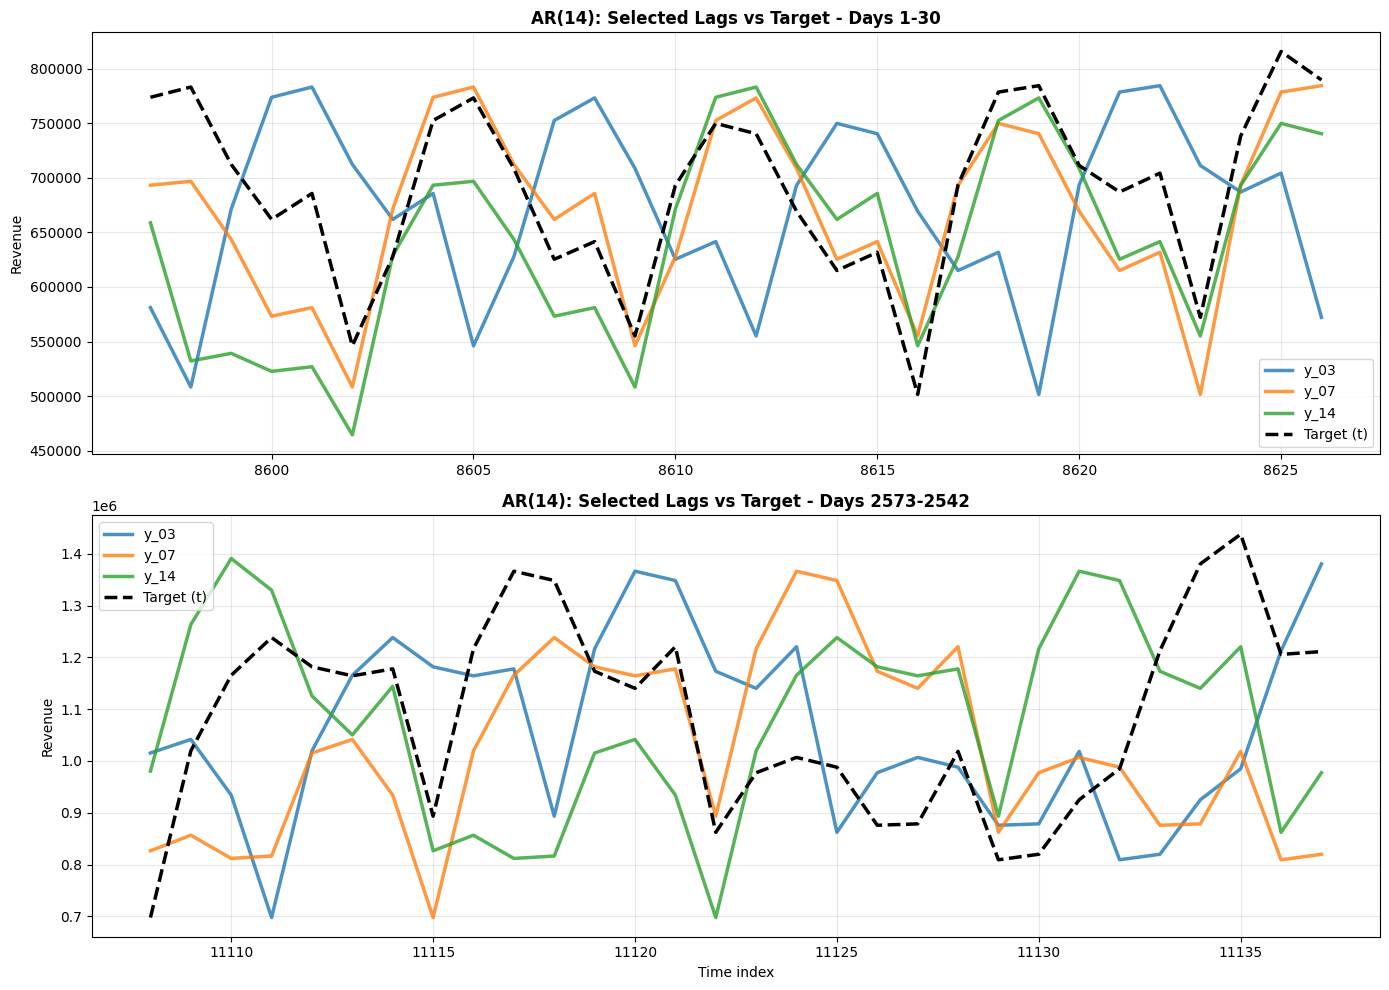

In [235]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

window_size = 30

for i, ax in enumerate(axes):
    if i % 2 == 0:  
        start_idx = i
        end_idx = (i + 1) * window_size
        title_label = f"Days {start_idx+1}-{end_idx}"
    else:  
        start_idx = -(window_size + 1)
        end_idx = -i
        title_label = f"Days {len(x)-start_idx}-{len(x)}"
    
    x_subset = x.iloc[start_idx:end_idx, :]
    y_subset = y.iloc[start_idx:end_idx]
    
    for lag_name in lags_to_plot:
        ax.plot(x_subset.index, x_subset[lag_name].values, linewidth=2.5, alpha=0.8, label=lag_name)

    ax.plot(y_subset.index, y_subset.values, color='black', linestyle='--', linewidth=2.5, label='Target (t)')
    
    ax.set_title(f"AR(14): Selected Lags vs Target - {title_label}", fontweight='bold', fontsize=12)
    ax.set_ylabel("Revenue")
    ax.legend(loc='best')
    ax.grid(alpha=0.3)


axes[-1].set_xlabel("Time index")

plt.tight_layout()
plt.show()

In [236]:
class AR_forecaster:
  covariate_lags:list = [1, 2, 3, 4, 5, 6, 7]
  theta:np.array=None
  def __init__(self, covariate_lags=[1]):
    self.covariate_lags = covariate_lags
    self.theta = np.zeros(len(covariate_lags))

  def fit(self, y:pd.Series):
    # obtain the lags defining the model's features
    x, y = format_data(y, covariate_lags=self.covariate_lags, target_lags=[0])
    # fit the parameters
    self.theta = np.linalg.inv(x.values.T @ x.values) @ x.values.T @ y.values
    return self

  def predict(self, y:pd.Series, steps_ahead=1):
      # recursive prediction: at each step the model predicts one step ahead
      # the prediction is then used as last observation
      y_pred = []
      x_i, _ = format_data(y, covariate_lags=self.covariate_lags)
      x_i = x_i.iloc[[-1], :].values

      for i in range(steps_ahead):
          # prediction step
          y_pred_i = x_i @ self.theta
          # store the prediction
          y_pred.append(y_pred_i)
          # recursive strategy - augment and roll the feature vector
          x_i = np.hstack([x_i, y_pred_i])
          x_i = x_i[:, 1:]
      
      # Create appropriate index
      if isinstance(y.index, pd.DatetimeIndex):
          index = pd.date_range(start=y.index[-1]+pd.Timedelta(days=1), periods=steps_ahead, freq='D')
      else:
          index = np.arange(len(y), len(y)+steps_ahead)

      return pd.Series(np.hstack(y_pred).ravel(), index=index)

In [237]:
def evaluate_model(model_class, y, steps_ahead, tr_ratio=0.8, **model_kwargs):
  n_tr = int(len(y)*tr_ratio)
  n_val = len(y) - n_tr
  y_tr = y.iloc[:n_tr]
  model = model_class(**model_kwargs).fit(y_tr)
  y_hats = []
  errs = []
  for i in range(n_val-steps_ahead):
    y_hat_i = model.predict(y.iloc[:n_tr+i], steps_ahead=steps_ahead).values
    y_hats.append(y_hat_i)
    y_true_i = y.iloc[n_tr+i:n_tr+i+steps_ahead].values.ravel()
    errs.append((y_hat_i - y_true_i))
  y_hats = np.vstack(y_hats)
  errs = np.vstack(errs)
  score = np.mean((np.mean(np.abs(np.array(errs)), axis=1)))
  return score, y_hats, errs

In [253]:
y_orig = df['Revenue']
y_diff = series_diff

tr_ratio = 0.8
steps_ahead = 7

def evaluate_model_with_inversion(model_class, y_orig, y_diff, steps_ahead, tr_ratio=0.8, **model_kwargs):
    
    # Allinea gli indici per sicurezza
    y_orig = y_orig[y_diff.index] 
    
    n_tr = int(len(y_diff) * tr_ratio)
    n_val = len(y_diff) - n_tr
    
    # A) Addestra su dati DIFFERENZIATI
    y_tr_diff = y_diff.iloc[:n_tr]
    model = model_class(**model_kwargs).fit(y_tr_diff) # Addestra su 'train'
    
    errs = []
    
    for i in range(n_val - steps_ahead):
        history_diff = y_diff.iloc[:n_tr + i]
        
        # B) Prevedi le DIFFERENZE
        y_hat_diff_i = model.predict(history_diff, steps_ahead=steps_ahead).values
        
        # C) INVERTI la previsione per tornare a Revenue
        last_known_revenue = y_orig.iloc[n_tr + i - 1] 
        y_hat_i = last_known_revenue + np.cumsum(y_hat_diff_i)
        
        # D) Calcola l'errore sui dati ORIGINALI
        y_true_i = y_orig.iloc[n_tr + i : n_tr + i + steps_ahead].values.ravel()
        errs.append((y_hat_i - y_true_i))
        
    errs = np.vstack(errs)
    score = np.mean((np.mean(np.abs(np.array(errs)), axis=1)))
    return score, model # Restituisce anche il modello addestrato

ar_lags = [1, 3, 5, 7, 14]
ar_models = {}
scores = {}

print("Evaluating AR models (with differencing and inversion)...")
for lag in ar_lags:
    
    # Chiama la funzione corretta!
    score, fitted_model = evaluate_model_with_inversion(
        AR_forecaster, 
        y_orig=y_orig, 
        y_diff=y_diff, 
        covariate_lags=range(1, lag+1), 
        steps_ahead=steps_ahead,
        tr_ratio=tr_ratio
    )
    
    scores[lag] = score
    ar_models[lag] = fitted_model # Salva il modello già addestrato
    print(f"AR({lag}) MAE: {score:.2e}")

best_lag = min(scores, key=scores.get) # ERRORE CORRETTO: era 'best_log'
best_mae = scores[best_lag]

print(f"\n🏆 Best model: AR({best_lag}) with MAE = {best_mae:.2e}")

# 'best_model' è il modello addestrato sul set di training (80%)
best_model = ar_models[best_lag]

Evaluating AR models (with differencing and inversion)...
AR(1) MAE: 1.88e+05
AR(3) MAE: 1.99e+05
AR(5) MAE: 1.97e+05
AR(7) MAE: 2.39e+05
AR(14) MAE: 2.37e+05

🏆 Best model: AR(1) with MAE = 1.88e+05


## Confronto con i modelli di prima

Esecuzione backtest per i modelli baseline (potrebbe richiedere tempo)...
Seasonal Naive    150926.178405
Best AR(1)        188458.459216
Naive             193177.327506
dtype: float64

--- VERDETTO ---
🏆 The best model (properly tested) is: Seasonal Naive MAE = 1.51e+05


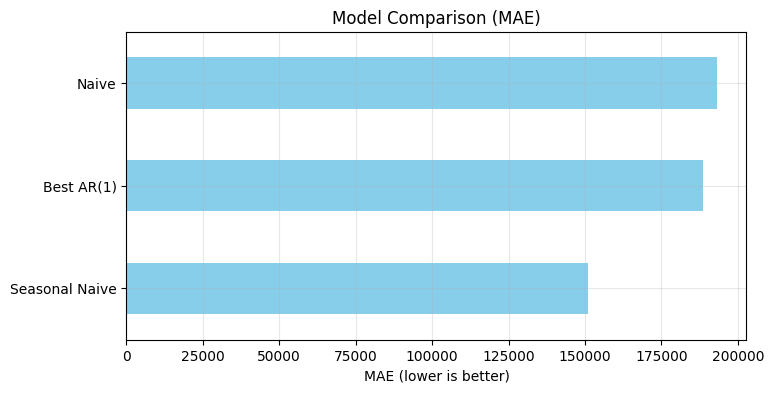

In [254]:
def naive_forecaster(x, h):
    return cast_df(np.tile(x.iloc[-1], h), x)

def seasonal_naive_forecaster(x, h, p=7): 
    return cast_df(np.tile(x.iloc[-p:].values, int(np.ceil(h/p)))[:h], x)

def evaluate_baseline(forecaster_func, y_orig, steps_ahead, tr_ratio=0.8, **func_kwargs):
    n_tr = int(len(y_orig) * tr_ratio)
    n_val = len(y_orig) - n_tr
    
    errs = []
    
    for i in range(n_val - steps_ahead):
        history_orig = y_orig.iloc[:n_tr + i]
        
        y_hat_i = forecaster_func(history_orig, steps_ahead, **func_kwargs).values.flatten()
        
        y_true_i = y_orig.iloc[n_tr + i : n_tr + i + steps_ahead].values.ravel()
        
        if len(y_hat_i) == len(y_true_i):
            errs.append((y_hat_i - y_true_i))
        
    errs = np.vstack(errs)
    mae_per_forecast = np.mean(np.abs(errs), axis=1)
    score = mae_per_forecast.mean()
    return score

# y_orig = df['Revenue'] 
# tr_ratio = 0.8
# steps_ahead = 7

print("Esecuzione backtest per i modelli baseline (potrebbe richiedere tempo)...")

mae_naive_backtest = evaluate_baseline(
    naive_forecaster, 
    y_orig, 
    steps_ahead, 
    tr_ratio
)

mae_seasonal_backtest = evaluate_baseline(
    seasonal_naive_forecaster, 
    y_orig, 
    steps_ahead, 
    tr_ratio, 
    p=p
)

final_scores = {
    "Naive": mae_naive_backtest,
    "Seasonal Naive": mae_seasonal_backtest,
    "Best AR(1)": best_mae
}

final_mae_series = pd.Series(final_scores).sort_values()

print(final_mae_series)

print("\n--- VERDETTO ---")
best_overall_name = final_mae_series.idxmin()
best_overall_value = final_mae_series.min()

print(f"🏆 The best model (properly tested) is: {best_overall_name} MAE = {best_overall_value:.2e}")


final_mae_series.plot(
    kind='barh', 
    color='skyblue', 
    figsize=(8, 4), 
    title="Model Comparison (MAE)"
)
plt.xlabel("MAE (lower is better)")
plt.grid(alpha=0.3)
plt.show()


### Evaluation with Forecast

Evaluating seasonal_naive_forecaster: 100%|██████████| 505/505 [00:00<00:00, 22790.72it/s]


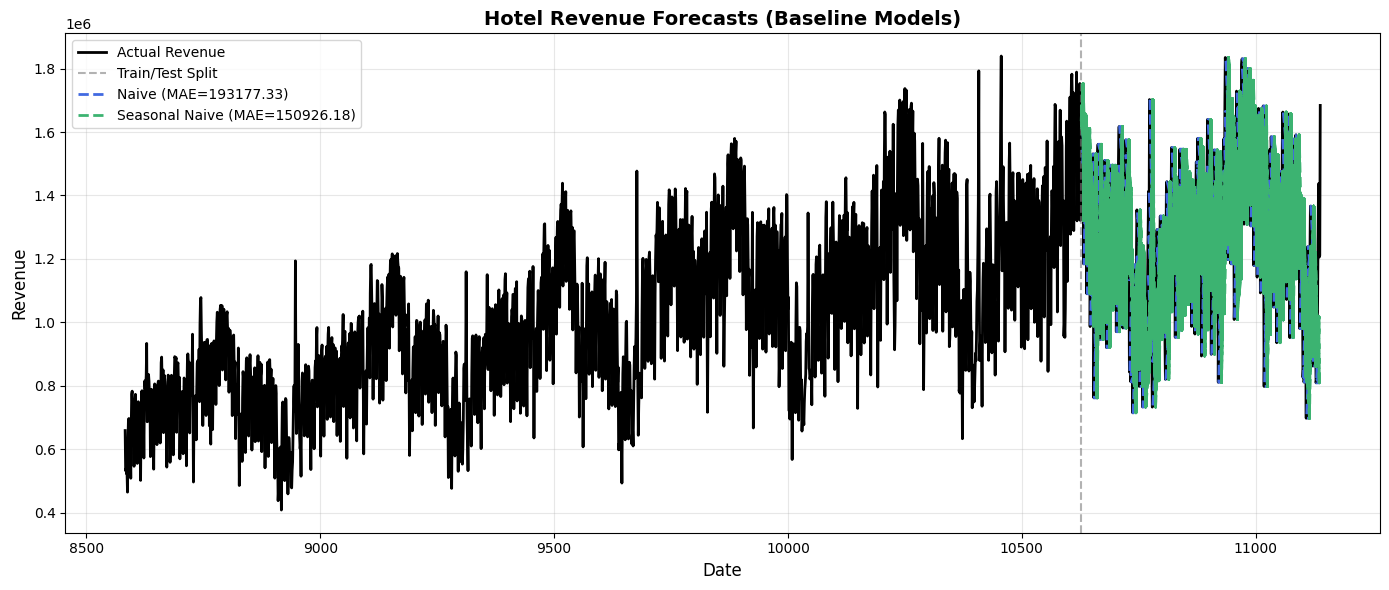

In [255]:
import numpy as np
import pandas as pd
from tqdm import tqdm

def evaluate_baseline_with_forecasts(forecaster_func, y, steps_ahead, tr_ratio=0.8, **func_kwargs):
    n_tr = int(len(y) * tr_ratio)
    n_val = len(y) - n_tr
    
    errs = []
    preds = []
    forecast_index = []

    for i in tqdm(range(n_val - steps_ahead), desc=f"Evaluating {forecaster_func.__name__}"):
        history = y.iloc[:n_tr + i]
        y_hat_i = forecaster_func(history, steps_ahead, **func_kwargs).values.flatten()
        y_true_i = y.iloc[n_tr + i : n_tr + i + steps_ahead].values.ravel()
        
        # Align forecast to its true dates
        idx = y.iloc[n_tr + i : n_tr + i + steps_ahead].index
        preds.extend(y_hat_i)
        forecast_index.extend(idx)
        
        if len(y_hat_i) == len(y_true_i):
            errs.append(y_hat_i - y_true_i)

    errs = np.vstack(errs)
    mae = np.mean(np.mean(np.abs(errs), axis=1))

    # Reconstruct a full prediction series
    forecast_series = pd.Series(preds, index=forecast_index)
    
    return {"MAE": mae, "Forecast": forecast_series}


results = {}
results["Naive"] = evaluate_baseline_with_forecasts(naive_forecaster, y_orig, 7)
results["Seasonal Naive"] = evaluate_baseline_with_forecasts(seasonal_naive_forecaster, y_orig, 7, p=7)

# If you have an AR(1) forecast, add it here too
results["AR(1)"] = {"MAE": best_mae, "Forecast": None}

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Full actual series
plt.plot(y_orig.index, y_orig, color='black', label='Actual Revenue', linewidth=2)

# Training/test split line
n_tr = int(len(y_orig) * 0.8)
plt.axvline(y_orig.index[n_tr], color='gray', linestyle='--', alpha=0.6, label='Train/Test Split')

# Forecast overlays
colors = {'Naive': 'royalblue', 'Seasonal Naive': 'mediumseagreen', 'AR(1)': 'darkorange'}

for name, res in results.items():
    if res["Forecast"] is not None:
        plt.plot(res["Forecast"].index, res["Forecast"].values, 
                 label=f"{name} (MAE={res['MAE']:.2f})", 
                 color=colors.get(name, None),
                 linewidth=2, linestyle='--')

plt.title("Hotel Revenue Forecasts (Baseline Models)", fontsize=14, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



## Filter Residuals

In [241]:
n_tr = int(len(df['Revenue']) * 0.8)
y_train = df['Revenue'].iloc[:n_tr]
y_test = df['Revenue'].iloc[n_tr:]

# Fit su train
best_model.fit(y_train)

# Predici su test
y_pred_test = best_model.predict(y_train, steps_ahead=len(y_test))

# Residuals
residuals = y_test.values - y_pred_test.values[:len(y_test)]

print(f"Residuals mean: {residuals.mean():.4f}")
print(f"Residuals std: {residuals.std():.2e}")


Residuals mean: 1042903.2682
Residuals std: 4.13e+05


In [242]:
# --- FASE 2: PREVISIONE FINALE ---

# 1. Prepara i dati (tutti, 2013-2020)
# 'df' dovrebbe contenere tutti i dati fino alla fine del 2020
# Il modello Seasonal Naive usa la serie ORIGINALE, non quella differenziata.
y_orig_all = df['Revenue'] 

# 2. Definisci i parametri per il modello VINCITORE
steps_ahead = 7
p = 7  # Questa è la stagionalità settimanale (la chiave del 'Seasonal Naive')

print(f"Previsione 1-{steps_ahead} giorni ahead con il modello vincitore: Seasonal Naive (p={p})...")

# 3. Estrai l'ultima stagione (gli ultimi 'p' giorni)
# Questi sono i valori che ripeteremo
last_season_values = y_orig_all.iloc[-p:].values

# 4. Genera la previsione
# La logica è "ripeti l'ultimo pattern settimanale"
# (Questa è la logica della tua funzione 'seasonal_alternative')
final_forecast_values = np.tile(last_season_values, int(np.ceil(steps_ahead / p)))[:steps_ahead]

# 5. Crea l'indice futuro corretto (come hai fatto prima)
if isinstance(y_orig_all.index, pd.DatetimeIndex):
    final_index = pd.date_range(
        start=y_orig_all.index[-1] + pd.Timedelta(days=1), 
        periods=steps_ahead, 
        freq='D'
    )
else:
    # Fallback se non è un indice di date
    start_idx = y_orig_all.index[-1] + 1
    final_index = np.arange(start_idx, start_idx + steps_ahead)

# 6. Crea la Serie finale
final_forecast = pd.Series(final_forecast_values, index=final_index, name="Revenue_Forecast")

# 7. Stampa la risposta alla tua task
print("\n--- PREVISIONE REVENUE 1-7 GIORNI AHEAD ---")
print(final_forecast)

Previsione 1-7 giorni ahead con il modello vincitore: Seasonal Naive (p=7)...

--- PREVISIONE REVENUE 1-7 GIORNI AHEAD ---
11139    9.849226e+05
11140    1.212984e+06
11141    1.380631e+06
11142    1.437999e+06
11143    1.205904e+06
11144    1.211344e+06
11145    1.684020e+06
Name: Revenue_Forecast, dtype: float64
